In [37]:
import tweepy
import pandas as pd
import re
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
log = pd.read_csv("Login.txt")

In [3]:
consumerKey = log.Logs[0]
consumerSecret = log.Logs[1]
accessToken = log.Logs[2]
accessTokenSecret = log.Logs[3]

In [4]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

In [5]:
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [54]:
posts = api.user_timeline(screen_name="Meta", count=5000, lang="en", tweet_mode="extended")

In [25]:
tweets = api.search(q="Meta Facebook", lang="en", count=1000)

In [26]:
tweets = [tweet.text for tweet in tweets]
df = pd.DataFrame(tweets, columns=["Tweets"])
df.head()

,Tweets
0,Facebook working on mysterious ‘authentic’ rob...
1,Please read more #Metaverse #Decentraland #The...
2,RT @andrewrsorkin: This deal is about one thin...
3,RT @ohhshiny: Everybody's doing the metaverse ...
4,"RT @michellemanafy: On Tuesday, the Justice De..."


In [28]:
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9]+", '', text)
    text = re.sub(r"#", '', text)
    text = re.sub(r"RT[\s]+", "", text)
    text = re.sub(r"https?:\/\/\s+", '', text)  
    return text

In [30]:
len(df)

100

In [29]:
df["Tweets"] = df["Tweets"].apply(clean_text)
df["Tweets"]

0     Facebook working on mysterious ‘authentic’ rob...
1     Please read more Metaverse Decentraland TheSan...
2     : This deal is about one thing and one thing o...
3     : Everybody's doing the metaverse merge 🕺\n\nM...
4     : On Tuesday, the Justice Department and Feder...
                            ...                        
95       Drama Queen, this happens a thousand times ...
96    _: - Walmart to join the metaverse\n- Facebook...
97    _NBA my trust wallet, coin case meta mask twit...
98     my name is peninah Owando. I have been a Face...
99    So Is Facebook (META SPACE) The Social Media A...
Name: Tweets, Length: 100, dtype: object

In [32]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [34]:
df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

In [35]:
df.head()

,Tweets,Subjectivity,Polarity
0,Facebook working on mysterious ‘authentic’ rob...,0.875,0.25
1,Please read more Metaverse Decentraland TheSan...,0.500,0.50
2,: This deal is about one thing and one thing o...,1.000,0.00
3,: Everybody's doing the metaverse merge 🕺\n\nM...,0.000,0.00
4,": On Tuesday, the Justice Department and Feder...",0.000,0.00


In [44]:
def create_worscloud(tweets):
    allWords = " ".join([twt for twt in tweets])
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


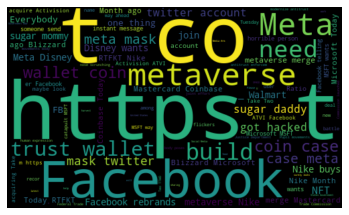

In [56]:
create_worscloud(df["Tweets"])

In [57]:
def tweetPositivity(score):
    if score > 0:
        return "Positive"
    if score == 0:
        return "Neutral"
    if score < 0:
        return "Negative"

In [59]:
df["Analysis"] = df["Polarity"].apply(tweetPositivity)

In [62]:
df[df["Analysis"] == "Negative"]

,Tweets,Subjectivity,Polarity,Analysis
5,Facebook takes the security of its users' a...,0.866667,-0.433333,Negative
7,Not good enough. &amp; must answer for t...,0.550000,-0.175000,Negative
9,: Just had someone send me an instant message ...,0.833333,-0.500000,Negative
14,: Just had someone send me an instant message ...,0.833333,-0.500000,Negative
27,: If buying Instagram gets Meta/Facebook in an...,0.200000,-0.200000,Negative
31,"Due to Two factor authentication, I am not abl...",0.500000,-0.187500,Negative
40,: Just had someone send me an instant message ...,0.833333,-0.500000,Negative
42,: Just had someone send me an instant message ...,0.833333,-0.500000,Negative
46,"Facebook, aka, Meta, has patented an artificia...",0.675000,-0.275000,Negative
53,Day 449 of not being able to log into thanks ...,0.608333,-0.100000,Negative


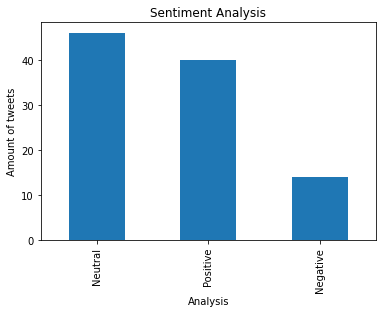

In [63]:
plt.title("Sentiment Analysis")
plt.xlabel("Analysis")
plt.ylabel("Amount of tweets")
df["Analysis"].value_counts().plot(kind="bar")
plt.show()